In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('test.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
#encode
le=LabelEncoder()
df['name']=le.fit_transform(df['name'])
df['fuel']=le.fit_transform(df['fuel'])
df['seller_type']=le.fit_transform(df['seller_type'])
df['transmission']=le.fit_transform(df['transmission'])
df['owner']=le.fit_transform(df['owner'])
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   name           4340 non-null   int64
 1   year           4340 non-null   int64
 2   selling_price  4340 non-null   int64
 3   km_driven      4340 non-null   int64
 4   fuel           4340 non-null   int64
 5   seller_type    4340 non-null   int64
 6   transmission   4340 non-null   int64
 7   owner          4340 non-null   int64
dtypes: int64(8)
memory usage: 271.4 KB


In [48]:
x=df[['name','year','km_driven','fuel','seller_type','transmission','owner']].values
y=df[['selling_price']].values

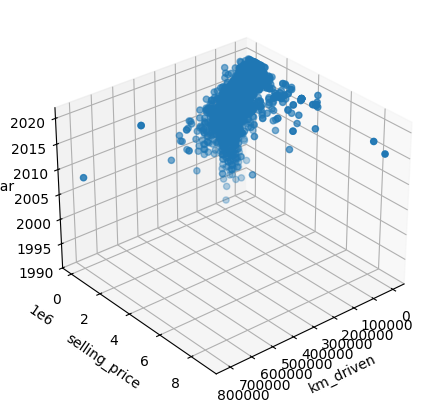

In [46]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(projection='3d')
ax.scatter(df['km_driven'], df['selling_price'], df['year'])
ax.set_xlabel('km_driven')
ax.set_ylabel('selling_price')
ax.set_zlabel('year')
ax.view_init(elev=30, azim=50)
plt.show()